# compare the proportion of cells in WT and MUT conditions

In [1]:
import scanpy as sc 
import numpy as np
import pandas as pd
import os
import sys
from matplotlib import pyplot as plt
import anndata as ad


In [2]:
import seaborn as sn

In [3]:
sys.path.append("/home/lucy/star_proto_filter/")
sys.path.append("/home/lucy/")
sys.path.append("/home/lucy/AmbientContaminationMetrics/")
#sys.path.append("/home/lucy/quality/plot_quality_score.py")


In [4]:
import zc_filter_function as zc_filter
import quality_control_function as zc_qc
import plot_quality_score as qc_plt
import zc_function as zc

## load subsampled data

In [5]:
dat = sc.read("./new_sample_10868_filtered/subsampled_combine_WT_Mut.h5ad")

In [6]:
dat

AnnData object with n_obs × n_vars = 9010 × 23312
    obs: 'sample', 'cell_type', 'cytotrace', 'leiden', 'condition'
    var: 'mean', 'std'
    uns: 'cell_type_colors', 'condition_colors', 'leiden', 'leiden_colors', 'neighbors', 'pca', 'sample_colors', 'treatment_colors', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'arcsinh', 'raw_counts'
    obsp: 'connectivities', 'distances'

/home/lucy/.local/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/lucy/.local/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


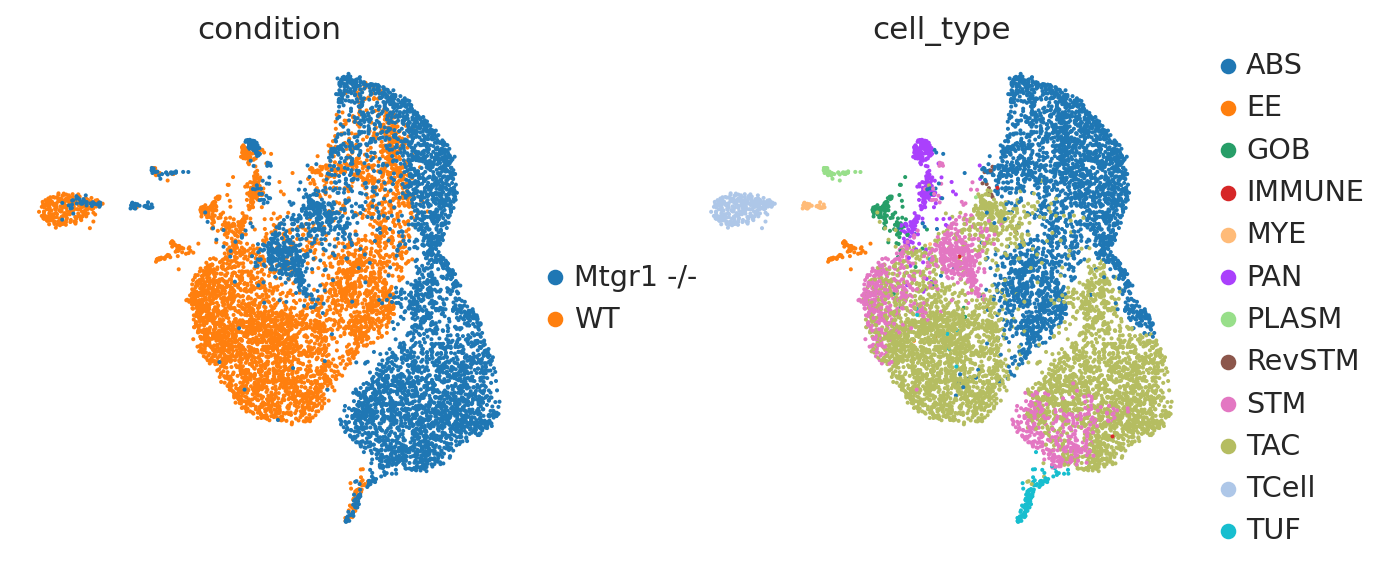

In [61]:
sc.pl.umap( dat, color = ['condition', 'cell_type'] )

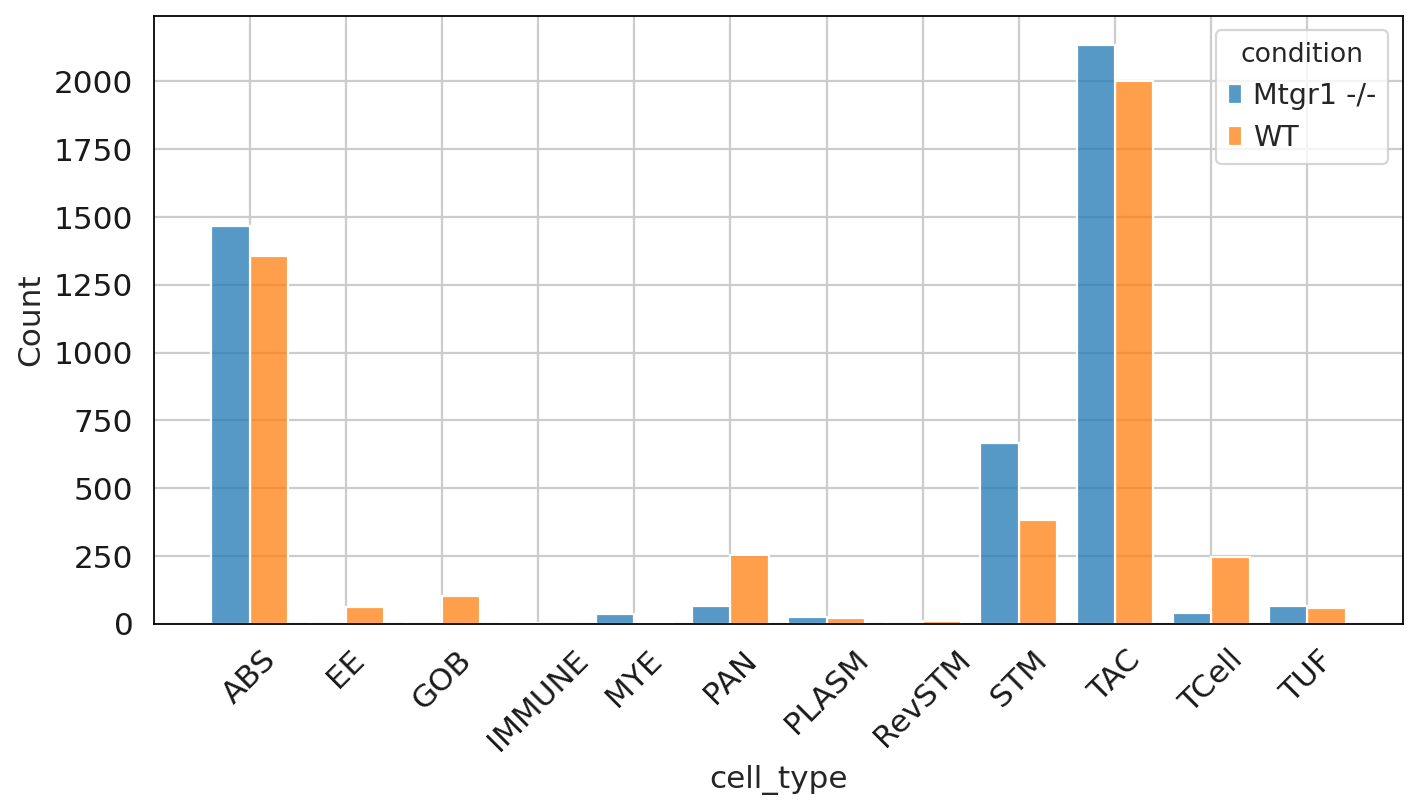

In [62]:
f,ax1 = plt.subplots(figsize = [10,5])
sn.histplot( data = dat.obs, x = 'cell_type', hue = 'condition', multiple='dodge', 
            ax = ax1, shrink = 0.8,
            color=list( dat.uns['cell_type_colors'] ))

t = plt.xticks(rotation=45)

In [63]:
dat[dat.obs['cell_type'] == 'RevSTM']

View of AnnData object with n_obs × n_vars = 9 × 23312
    obs: 'sample', 'cell_type', 'cytotrace', 'leiden', 'condition'
    var: 'mean', 'std'
    uns: 'cell_type_colors', 'condition_colors', 'leiden', 'leiden_colors', 'neighbors', 'pca', 'sample_colors', 'treatment_colors', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'arcsinh', 'raw_counts'
    obsp: 'connectivities', 'distances'

In [64]:
dat_main = dat[dat.obs['cell_type'] != 'RevSTM']

In [65]:
dat_main = dat_main[dat_main.obs['cell_type'] != 'IMMUNE']

In [66]:
dat_main.obs['condition'].unique()

['WT', 'Mtgr1 -/-']
Categories (2, object): ['Mtgr1 -/-', 'WT']

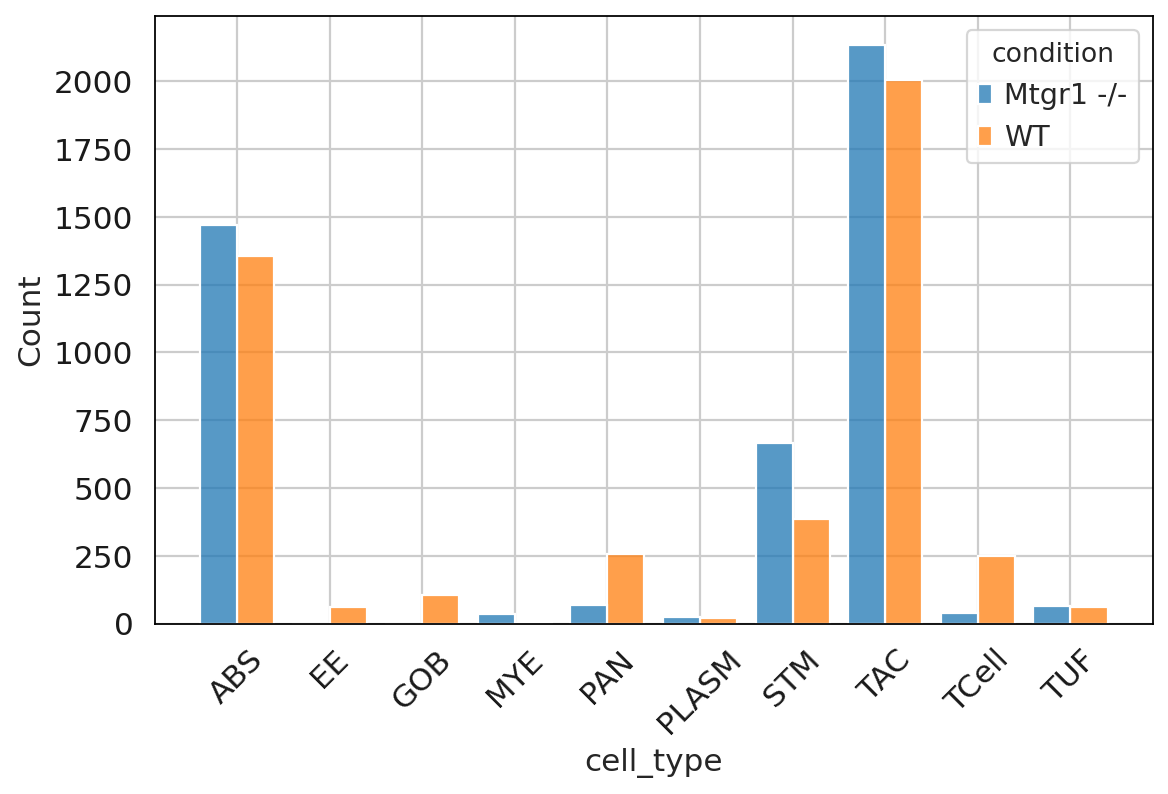

In [67]:
f,ax1 = plt.subplots(figsize = [8,5])
sn.histplot( data = dat_main.obs, x = 'cell_type', hue = 'condition', multiple='dodge', 
            #hue_order=['WT', 'Mtgr1-/-'],
            ax = ax1, shrink = 0.8,
            color=list( dat.uns['cell_type_colors'] ))

t = plt.xticks(rotation=45)

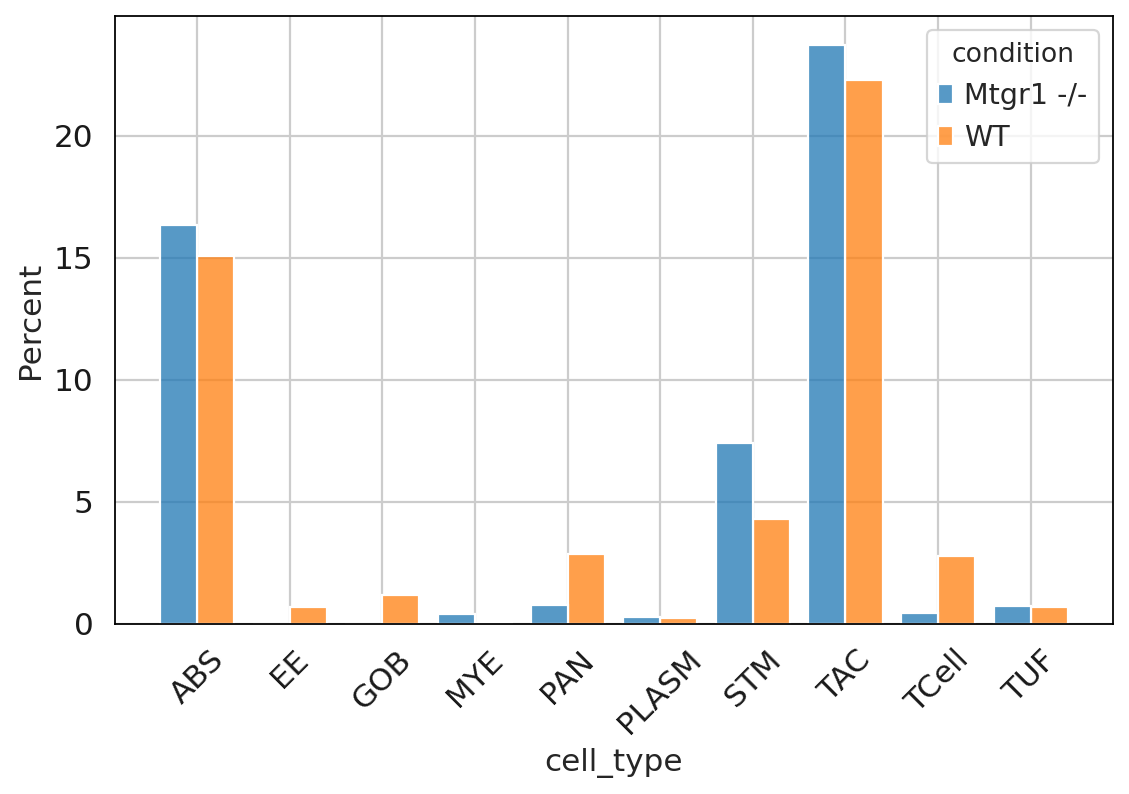

In [87]:
f,ax1 = plt.subplots(figsize = [8,5])
sn.histplot( data = dat_main.obs, x = 'cell_type', hue = 'condition', multiple='dodge', 
            #hue_order=['WT', 'Mtgr1-/-'],
            stat='percent',
            ax = ax1, shrink = 0.8,
            color=list( dat.uns['condition_colors'] ))

t = plt.xticks(rotation=45)

In [70]:
dat_main

View of AnnData object with n_obs × n_vars = 8997 × 23312
    obs: 'sample', 'cell_type', 'cytotrace', 'leiden', 'condition'
    var: 'mean', 'std'
    uns: 'cell_type_colors', 'condition_colors', 'leiden', 'leiden_colors', 'neighbors', 'pca', 'sample_colors', 'treatment_colors', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'arcsinh', 'raw_counts'
    obsp: 'connectivities', 'distances'

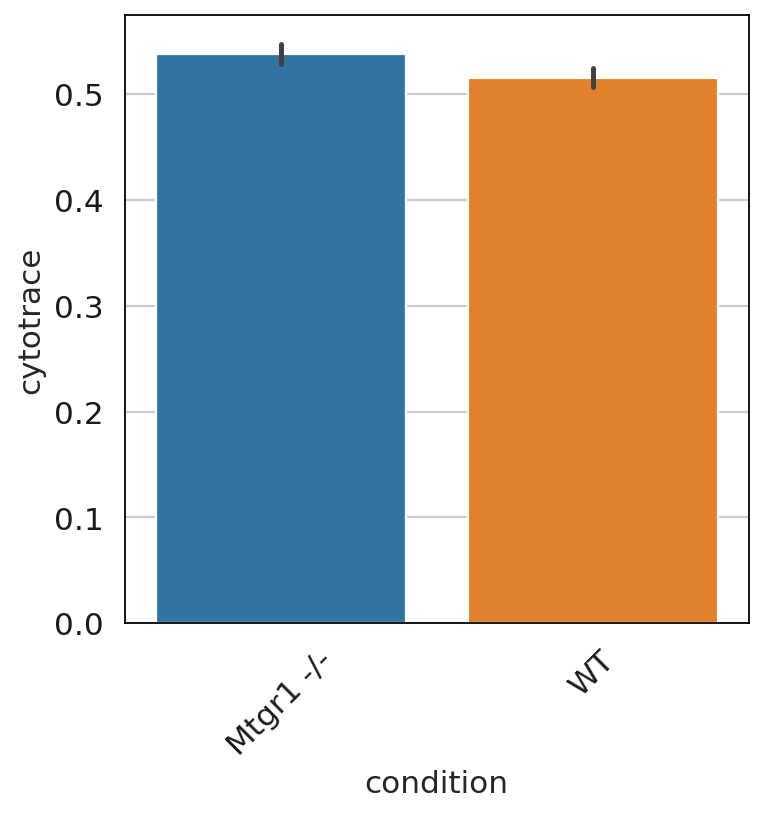

In [89]:
f,ax2 = plt.subplots(figsize = [5,5])
sn.barplot( data = dat_main.obs,  y = 'cytotrace', x = 'condition', hue = 'condition', legend = False,
       
            #hue_order=['WT', 'Mtgr1-/-'],
            ax = ax2,
          palette=list( dat.uns['condition_colors'] ))

t = plt.xticks(rotation=45)

### try percentage separated by condition

In [10]:
print( list(dat.obs['cell_type'].unique()) )

['EE', 'TAC', 'ABS', 'TCell', 'GOB', 'STM', 'PAN', 'TUF', 'PLASM', 'RevSTM', 'MYE', 'IMMUNE']


In [12]:
dat_epi = dat[np.isin(dat.obs['cell_type'], ['EE', 'TAC', 'ABS',  'GOB', 'STM', 'PAN', 'TUF'])]

In [13]:
cell_count_df = dat_epi.obs[['cell_type',  'condition']]

In [14]:
group_count_df = cell_count_df.groupby( ['condition','cell_type']).value_counts()

In [15]:
type( group_count_df ) #series
group_count_df = pd.DataFrame( group_count_df)

In [16]:
group_count_df.index[0]

('Mtgr1 -/-', 'ABS')

In [17]:
condition_counts = dat_epi.obs['condition'].value_counts()
condition_counts

condition
Mtgr1 -/-    4401
WT           4223
Name: count, dtype: int64

In [18]:
condition_counts['WT']

4223

/home/lucy/.local/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


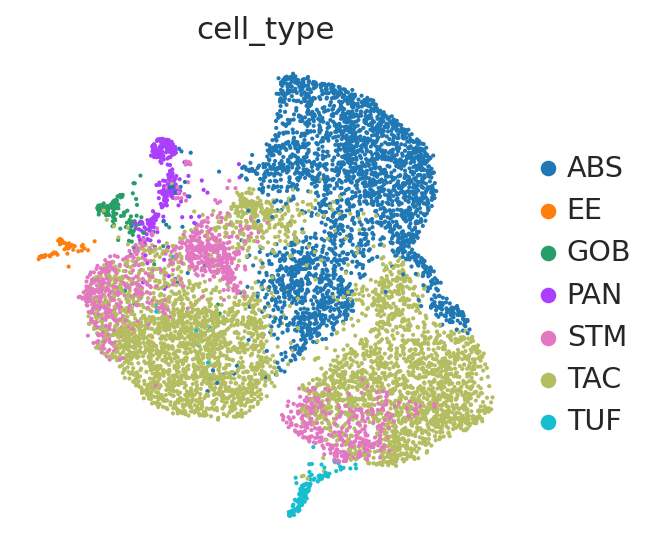

In [19]:
sc.pl.umap( dat_epi, color = 'cell_type' )

In [20]:
group_count_df

count
condition cell_type       
Mtgr1 -/- ABS         1468
          EE             0
          GOB            0
          PAN           67
          STM          667
          TAC         2135
          TUF           64
WT        ABS         1355
          EE            62
          GOB          104
          PAN          255
          STM          384
          TAC         2003
          TUF           60

In [21]:
pct_count = []
for i in group_count_df.index:
    if ( i[0] == 'WT'):
        pct_count.append( group_count_df.loc[i, 'count']/condition_counts['WT'] )
    else:
        pct_count.append( group_count_df.loc[i, 'count']/condition_counts['Mtgr1 -/-'] )

In [22]:
group_count_df['pct_count'] = pct_count

In [23]:
group_count_df

count  pct_count
condition cell_type                  
Mtgr1 -/- ABS         1468   0.333561
          EE             0   0.000000
          GOB            0   0.000000
          PAN           67   0.015224
          STM          667   0.151556
          TAC         2135   0.485117
          TUF           64   0.014542
WT        ABS         1355   0.320862
          EE            62   0.014682
          GOB          104   0.024627
          PAN          255   0.060384
          STM          384   0.090931
          TAC         2003   0.474307
          TUF           60   0.014208

In [24]:
group_count_df['condition'] = [ i[0] for i in group_count_df.index ]
group_count_df['cell_type'] = [ i[1] for i in group_count_df.index ]

In [25]:
group_count_df.reset_index(drop = True)

,count,pct_count,condition,cell_type
0,1468,0.333561,Mtgr1 -/-,ABS
1,0,0.000000,Mtgr1 -/-,EE
2,0,0.000000,Mtgr1 -/-,GOB
3,67,0.015224,Mtgr1 -/-,PAN
4,667,0.151556,Mtgr1 -/-,STM
5,2135,0.485117,Mtgr1 -/-,TAC
6,64,0.014542,Mtgr1 -/-,TUF
7,1355,0.320862,WT,ABS
8,62,0.014682,WT,EE
9,104,0.024627,WT,GOB


In [26]:
x = np.arange(0, 10, step=1.5)
x[0:7]

array([0. , 1.5, 3. , 4.5, 6. , 7.5, 9. ])

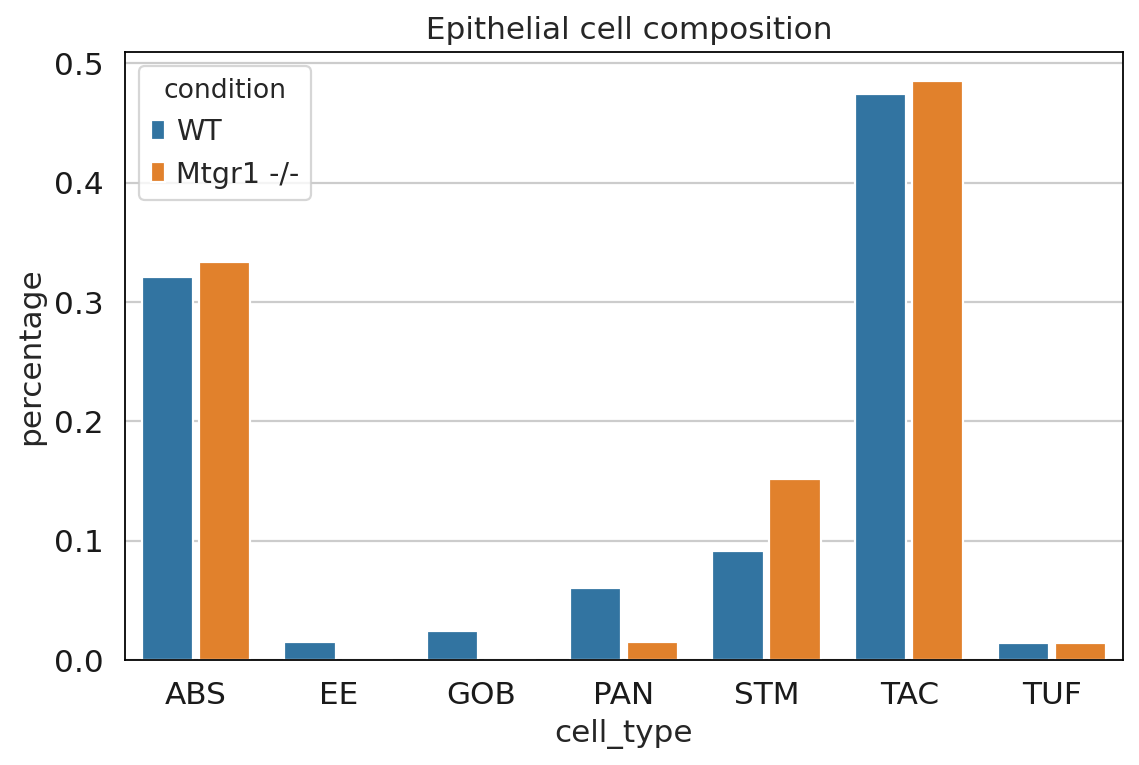

In [27]:
f,ax = plt.subplots(figsize = [8,5])
sn.barplot( data = group_count_df, x = 'cell_type', y = 'pct_count', hue = 'condition',
           hue_order=['WT', 'Mtgr1 -/-'],
            dodge=True, width=0.8, ax = ax, gap = 0.1 )
t= ax.set_ylabel( "percentage")
t = ax.set_title(" Epithelial cell composition")
loc, lab = plt.xticks()
#plt.xticks(np.arange(0, 1, step=0.2)) 
#plt.xticks(ticks = x[0:7] )
